Mesh has 25 nodes and 32 elements.
[[ 0  1  1  2  2  3  4  6  4  6  4  6  5  7  5  7  5  7  6  8  6  8  6  8
   9 12 11 15 14 17 19 22]
 [ 9 12 11 15 14 17 19 22  9 12 11 15 14 17 19 22 10 13 12 16 15 18 20 23
  10 13 12 16 15 18 20 23]
 [10 13 12 16 15 18 20 23 19 22 20 23 21 24 21 24 19 22 20 23 21 24 21 24
  19 22 20 23 21 24 21 24]]
(3, 32)


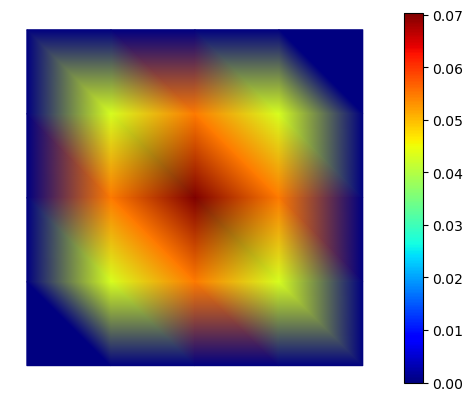

In [13]:
from skfem import *
from skfem.helpers import dot, grad

# create the mesh
mesh = MeshTri().refined(2)
# or, with your own points and elements:
# mesh = MeshTri(points, elements)

basis = Basis(mesh, ElementTriP1())
print(f'Mesh has {mesh.p.shape[1]} nodes and {mesh.t.shape[1]} elements.')
print(mesh.t)
print(mesh.t.shape)

@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))

@LinearForm
def rhs(v, _):
    return 1. * v

A = laplace.assemble(basis)
b = rhs.assemble(basis)

# Dirichlet boundary conditions
A, b = enforce(A, b, D=mesh.boundary_nodes())

# solve the linear system
x = solve(A, b)

# plot using matplotlib
mesh.plot(x, shading='gouraud', colorbar=True).show()